# General Usage
## Training start

1) Run the first cell, when its done click "RESTART RUNTIME"

2) Run the second cell

3) Run the last cell to execute


- If you go over in GPU you can restart the runtime and then do steps 2 and three above.


## Drive Mount + Git Pull Push

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/Shareddrives/EECS\ 442\ -\ Project/eecs442-proj
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/Shareddrives/EECS 442 - Project/eecs442-proj'
/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj


In [6]:
%cd drive/Shareddrives/EECS\ 442\ -\ Project/eecs442-proj
%load_ext autoreload
%autoreload 2

[Errno 2] No such file or directory: 'drive/Shareddrives/EECS 442 - Project/eecs442-proj'
/content/drive/Shareddrives/EECS 442 - Project/eecs442-proj
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#!git config --global user.email "wzahm@umich.edu"
#!git config --global user.name "Wyler Zahm"
#!git status
#!git checkout model_pipeline.py train_model.py
#!git pull
!git add Executor.ipynb config.json model_pipeline.py utils.py train_model.py basemodel_train_hist.txt models
!git commit -m "more gpu training stuff"
!git push
#!git add Executor.ipynb model_pipeline.py train_model.py
#!git commit -m "small changes"

[autoreload of model_pipeline failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ModuleNotFoundError: No module named 'pytorch_msssim'
]


^C
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
	modified:   Executor.ipynb
	modified:   config.json
	modified:   model_pipeline.py
	modified:   train_model.py
	modified:   utils.py

Untracked files:
	00019_00183_indoors_000_010.png
	__pycache__/
	basemodel_train_hist.txt
	densenet169-b2777c0a.pth
	diode/val.tar.gz
	main.txt
	model_checkpoints/
	models/__pycache__/
	models/basemodel_save_0.pt
	models/basemodel_save_12.pt
	models/basemodel_save_16.pt
	models/basemodel_save_20.pt
	models/basemodel_save_24.pt
	models/basemodel_save_28.pt
	models/basemodel_save_32.pt
	models/basemodel_save_36.pt
	models/basemodel_save_4.pt
	models/basemodel_save_8.pt

no changes added to commit
Everything up-to-date


## Data Downloading

In [ ]:
%cd diode
!wget http://diode-dataset.s3.amazonaws.com/val.tar.gz
!tar -zxvf val.tar.gz
%cd ..

!wget https://download.pytorch.org/models/densenet169-b2777c0a.pth

Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Model Exection

Using GPU.
Batch size: 4


  0%|          | 0/107 [00:00<?, ?it/s]

Model sent to GPU

Training and Evaluating Basemodel with: 	LR = 0.0001	WD = 0

Epoch #0


  3%|▎         | 3/107 [00:03<02:15,  1.31s/it]


KeyboardInterrupt: ignored

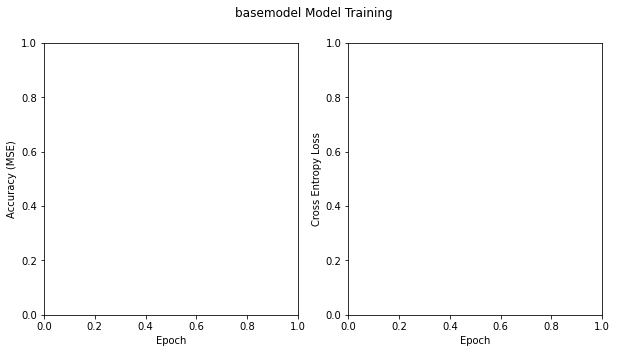

In [ ]:
from model_pipeline import main as exec_model
from PIL import Image
import matplotlib
%matplotlib inline

Image.open('./00019_00183_indoors_000_010.png') # Verify PIL is working.
exec_model(use_cuda=True, batch_size=4)